In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
# 绘图函数
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(y), cmap=plt.cm.Spectral)
# active func
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s
# 构造数据集
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

(2, 400) (1, 400)


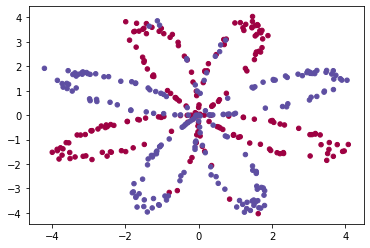

In [32]:
X,y = load_planar_dataset()
print(X.shape,y.shape)
plt.scatter(X[0,:],X[1,:],s = 20,c = np.squeeze(y),cmap = plt.cm.Spectral)

### logistic回归效果

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
clf = LogisticRegression()
clf.fit(X.T,y.T)

F:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

acc: 0.47


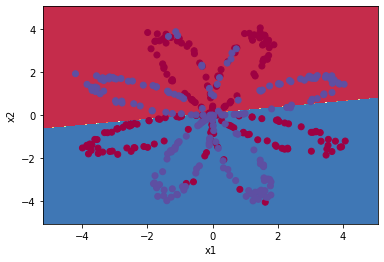

In [26]:
# 绘制决策区域
print('acc:',accuracy_score(np.squeeze(y),clf.predict(X.T)))
plot_decision_boundary(lambda x : clf.predict(x),X,y)

### 构建神经网络

In [36]:
# 网络结构
def layer_sizes(X,y):
    input_layers = X.shape[0]
    hidden_layers = 4
    output_layers = y.shape[0]
    return input_layers,hidden_layers,output_layers
# 初始化网络参数
def initialize_parameters(input_layers,hidden_layers,output_layers):
    np.random.seed(2)
    w1 = np.random.randn(hidden_layers,input_layers) * 0.01
    w2 = np.random.randn(output_layers,hidden_layers) * 0.01
    b1 = np.zeros(shape = (hidden_layers,1))
    b2 = np.zeros(shape = (output_layers,1))
    parameters = {'w1':w1,'w2':w2,'b1':b1,'b2':b2}
    return parameters
# 前向传播
def forward_propagation(X,y,parameters):
    w1 = parameters['w1']
    w2 = parameters['w2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    m = X.shape[1]
    z1 = np.dot(w1,X) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2,a1) + b2
    a2 = sigmoid(z2)
    
    costs = -1/m * np.sum(y*np.log(a2) + (1-y)*np.log(1-a2))
    cache = {'z1':z1,'z2':z2,'a1':a1,'a2':a2,'costs':costs}
    return cache
# 反向传播
def backward_propagation(cache,parameters,X,y):
    a1 = cache['a1']
    a2 = cache['a2']
    w1 = parameters['w1']
    w2 = parameters['w2']
    m = X.shape[1]
    dz2 = a2 - y
    print(a2.shape,y.shape)
    print(dz2.shape)
    dw2 = (1/m) * np.dot(dz2,a1.T)
    db2 = (1/m) * np.sum(dz2,axis = 1,keepdims = True)
    
    dz1 = np.multiply(np.dot(w2.T,dz2) ,1-np.power(a1,2))
    dw1 = (1/m) * np.dot(dz1,X.T)
    db1 = (1/m) * np.sum(dz1,axis = 1,keepdims = True)
    grads = {'dw1':dw1,'dw2':dw2,'db1':db1,'db2':db2}
    return grads
def update_parameters(parameters,grads,learning_rate):
    w1,w2 = parameters['w1'],parameters['w2']
    b1,b2 = parameters['b1'],parameters['b2']
    
    dw1,dw2 = grads['dw1'],grads['dw2']
    db1,db2 = grads['db1'],grads['db2']
    
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2
    
    new_parameters = {'w1':w1,'w2':w2,'b1':b1,'b2':b2}
    
    return new_parameters

    
    

In [37]:
(cache['a2'] - y).shape

(1, 400)

In [39]:
input_layers,hidden_layers,output_layers = layer_sizes(X,y)
parameters = initialize_parameters(input_layers,hidden_layers,output_layers)

iterations = 1000
for step in range(iterations):
    cache = forward_propagation(X,y,parameters)
    costs = cache['costs']
    grads = backward_propagation(cache,parameters,X,y)
    parameters = update_parameters(parameters,grads,learning_rate = 0.1)
    
    if step % 100 == 0:
        print('step:%d,cost%.4f'%(step,costs))

(1, 400) (1, 400)
(1, 400)
step:0,cost0.6930
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (

(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
step:400,cost0.6500
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400)

(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(1, 400) (1, 400)
(1, 400)
(